In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

from torchvision import datasets, transforms
from torch.nn import init

(1000,)
(1000,)


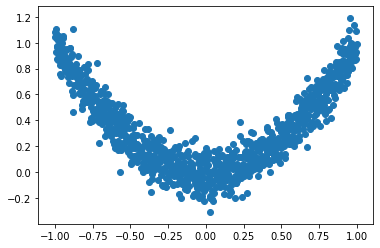

In [2]:
#创建fake data
# torch.manual_seed(99)
# x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
# y = x.pow(2) + 0.1 * torch.normal(torch.zeros(x.size()))
# plt.scatter(x.numpy(), y.numpy())
# plt.show()
 
np.random.seed(666)
X = np.linspace(-1, 1, 1000)
y = np.power(X, 2) + 0.1 * np.random.normal(0, 1, X.size)
print(X.shape)
print(y.shape)
plt.scatter(X, y)
plt.show()

In [3]:
# 创建训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1024)

X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
X_train = torch.unsqueeze(X_train, dim=1)  #转换成二维
y_train = torch.from_numpy(y_train).type(torch.FloatTensor)
y_train = torch.unsqueeze(y_train, dim=1)

X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
X_test = torch.unsqueeze(X_test, dim=1)  #转换成二维

X_train.shape, y_train.shape

(torch.Size([700, 1]), torch.Size([700, 1]))

In [4]:
BATCH_SIZE = 50
LR = 0.02
EPOCH = 5

In [5]:
#将数据装载dataloader中, 对数据进行分批训练
torch_data  = Data.TensorDataset(X_train, y_train)
loader = Data.DataLoader(dataset=torch_data, batch_size=BATCH_SIZE, shuffle=True)
next(iter(loader))[0].shape, next(iter(loader))[-1].shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [6]:
#创建自己的nn
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(1, 20)
        self.predict = nn.Linear(20, 1)
 
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x


In [7]:
adam_net = Net()
# 没有初始化损失
# {1: tensor(0.0265, grad_fn=<MseLossBackward>), 2: tensor(0.0121, grad_fn=<MseLossBackward>),
# 3: tensor(0.0096, grad_fn=<MseLossBackward>), 4: tensor(0.0109, grad_fn=<MseLossBackward>),
# 5: tensor(0.0104, grad_fn=<MseLossBackward>)}
#设置优化器和损失函数
opt_adam = torch.optim.Adam(adam_net.parameters(), lr=LR)
loss_func = nn.MSELoss()

In [8]:
#对数据进行分批训练
# 在神经网络中传递完整的数据集一次是不够的，
# 而且我们需要将完整的数据集在同样的神经网络中传递多次。
# 但是请记住，我们使用的是有限的数据集，
# 并且我们使用一个迭代过程即梯度下降。因此仅仅更新权重一次或者说使用一个 epoch 是不够的。
# 比如对于一个有 2000 个训练样本的数据集。将 2000 个样本分成大小为 500 的 batch，那么完成一个 epoch 需要 4 个 iteration。
all_loss = {}
for epoch in range(EPOCH):
    print('epoch', epoch)
    for step, (b_x, b_y) in enumerate(loader):
        print('step', step)
        pre = adam_net(b_x)
        loss = loss_func(pre, b_y)
        opt_adam.zero_grad()
        loss.backward()
        opt_adam.step()
        # print(loss)
        all_loss[epoch+1] = loss
print(all_loss)

epoch 0
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
epoch 1
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
epoch 2
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
epoch 3
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
epoch 4
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
{1: tensor(0.0269, grad_fn=<MseLossBackward>), 2: tensor(0.0173, grad_fn=<MseLossBackward>), 3: tensor(0.0127, grad_fn=<MseLossBackward>), 4: tensor(0.0112, grad_fn=<MseLossBackward>), 5: tensor(0.0097, grad_fn=<MseLossBackward>)}


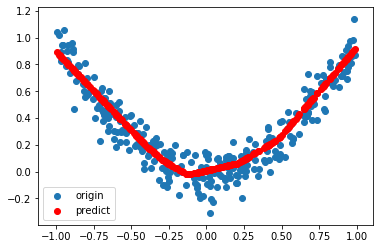

In [9]:
#对测试集进行预测
adam_net.eval()
predict = adam_net(X_test)
predict = predict.data.numpy()
plt.scatter(X_test.numpy(), y_test, label='origin')
plt.scatter(X_test.numpy(), predict, color='red', label='predict')
plt.legend()
plt.show()


epoch 0
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
epoch 1
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
epoch 2
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
epoch 3
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
epoch 4
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
{1: tensor(0.0297, grad_fn=<MseLossBackward>), 2: tensor(0.0136, grad_fn=<MseLossBackward>), 3: tensor(0.0123, grad_fn=<MseLossBackward>), 4: tensor(0.0189, grad_fn=<MseLossBackward>), 5: tensor(0.0091, grad_fn=<MseLossBackward>)}


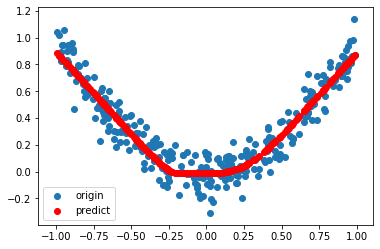

In [10]:
# 有初始化损失 xavier_normal  ：
#{1: tensor(0.0972, grad_fn=<MseLossBackward>), 2: tensor(0.0731, grad_fn=<MseLossBackward>),
# 3: tensor(0.0881, grad_fn=<MseLossBackward>), 4: tensor(0.1120, grad_fn=<MseLossBackward>),
# 5: tensor(0.1012, grad_fn=<MseLossBackward>)}

def weights_init(m):
    if isinstance(m, nn.Linear):
        init.xavier_normal_(m.weight.data)
        init.zeros_(m.bias.data)

adam_net = Net()
adam_net.apply(weights_init) # 对整个网络层进行参数初始化

opt_adam = torch.optim.Adam(adam_net.parameters(), lr=LR)

all_loss = {}
for epoch in range(EPOCH):
    print('epoch', epoch)
    for step, (b_x, b_y) in enumerate(loader):
        print('step', step)
        pre = adam_net(b_x)
        loss = loss_func(pre, b_y)
        opt_adam.zero_grad()
        loss.backward()
        opt_adam.step()
        # print(loss)
        all_loss[epoch+1] = loss
print(all_loss)

#对测试集进行预测
adam_net.eval()
predict = adam_net(X_test)
predict = predict.data.numpy()
plt.scatter(X_test.numpy(), y_test, label='origin')
plt.scatter(X_test.numpy(), predict, color='red', label='predict')
plt.legend()
plt.show()

epoch 0
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
epoch 1
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
epoch 2
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
epoch 3
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
epoch 4
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
{1: tensor(0.0281, grad_fn=<MseLossBackward>), 2: tensor(0.0137, grad_fn=<MseLossBackward>), 3: tensor(0.0146, grad_fn=<MseLossBackward>), 4: tensor(0.0134, grad_fn=<MseLossBackward>), 5: tensor(0.0182, grad_fn=<MseLossBackward>)}


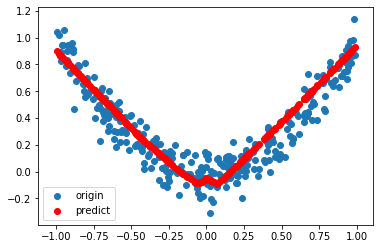

In [12]:
# 有初始化损失 kaiming_normal  ： 表现相对较好---
#{1: tensor(0.1476, grad_fn=<MseLossBackward>), 2: tensor(0.0234, grad_fn=<MseLossBackward>),
# 3: tensor(0.0162, grad_fn=<MseLossBackward>), 4: tensor(0.0170, grad_fn=<MseLossBackward>),
# 5: tensor(0.0218, grad_fn=<MseLossBackward>)}

def weights_init(m):
    if isinstance(m, nn.Linear):
        init.kaiming_normal_(m.weight.data)
        init.zeros_(m.bias.data)

adam_net = Net()
adam_net.apply(weights_init) # 对整个网络层进行参数初始化

opt_adam = torch.optim.Adam(adam_net.parameters(), lr=LR)

all_loss = {}
for epoch in range(EPOCH):
    print('epoch', epoch)
    for step, (b_x, b_y) in enumerate(loader):
        print('step', step)
        pre = adam_net(b_x)
        loss = loss_func(pre, b_y)
        opt_adam.zero_grad()
        loss.backward()
        opt_adam.step()
        # print(loss)
        all_loss[epoch+1] = loss
print(all_loss)

#对测试集进行预测
adam_net.eval()
predict = adam_net(X_test)
predict = predict.data.numpy()
plt.scatter(X_test.numpy(), y_test, label='origin')
plt.scatter(X_test.numpy(), predict, color='red', label='predict')
plt.legend()
plt.show()